# Table of Contents

1. [Import Packages](#1.-Import-Packages)
2. [Load and Inspect Data](#2.-Load-and-Inspect-Data)
3. [Data Preprocessing](#3.-Data-Preprocessing)

# 1. Import Packages

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt

# 2. Load and Inspect Data

In [84]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# To separate easier after cleaning
train_data["set"] = "train"
test_data["set"] = "test"

X = train_data.drop("SalePrice", axis=1)
y = train_data["SalePrice"]

all_data = pd.concat((X_train_full, test_data)).reset_index(drop=True)

In [85]:
X.shape, test_data.shape

((1460, 81), (1459, 81))

In [86]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,set
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,train


In [87]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [88]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


#### Divide to numerical and categorical

In [89]:
all_data["MSSubClass"] = all_data["MSSubClass"].astype("str") # MSSubClass is nominal

numerical = all_data.select_dtypes(exclude="object")
categorical = all_data.select_dtypes(include="object")

# 3. Data Preprocessing

#### Missing values

In [90]:
missing = pd.DataFrame((all_data.isna().sum() / len(all_data) * 100).\
                       sort_values(ascending=False).head(35).reset_index())
missing.columns = ['Features', 'Percent']

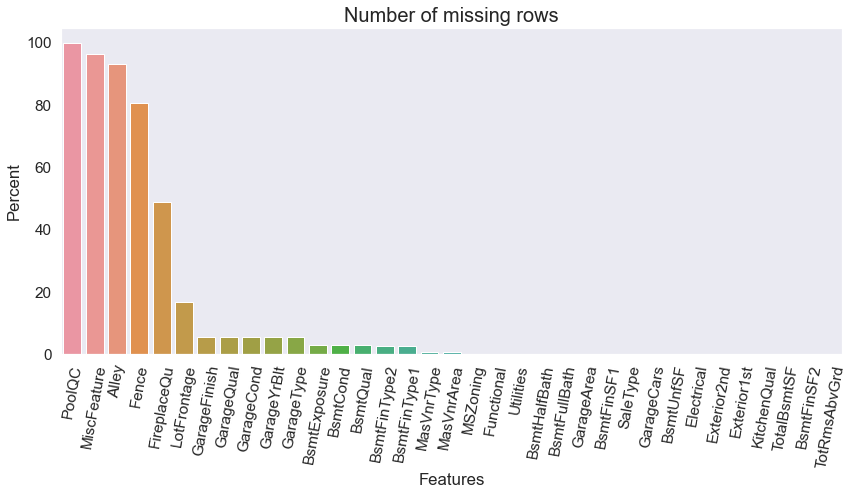

In [91]:
plt.figure(figsize=(14, 6))
plt.title('Number of missing rows', fontsize=20)
sns.barplot(x = "Features", y = 'Percent', data = missing)
plt.xticks(rotation=80)
plt.show()

In [92]:
# Columns where NaN's mean None
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for col in none_cols:
    all_data[col].fillna("None", inplace=True)

    
# Columns where NaN's mean 0
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

for col in zero_cols:
    all_data[col].fillna(0, inplace=True)

    
# Columns where NaN's will be replaced with most frequent choice
most_frequent_cols = ["Utilities", "Functional", "Electrical",
                     "KitchenQual", "Exterior2nd", "Exterior1st", "SaleType"]

for col in most_frequent_cols:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

    
# LotFrontage NaN's will be replaced with median value according to neighborhood
all_data.LotFrontage = all_data.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))


# MSZoning's NaN's will be replaced with most common option according to MSSubClass
all_data.MSZoning = all_data.groupby('MSSubClass').MSZoning.apply(lambda x: x.fillna(x.mode()[0]))

#### Correlation Matrix

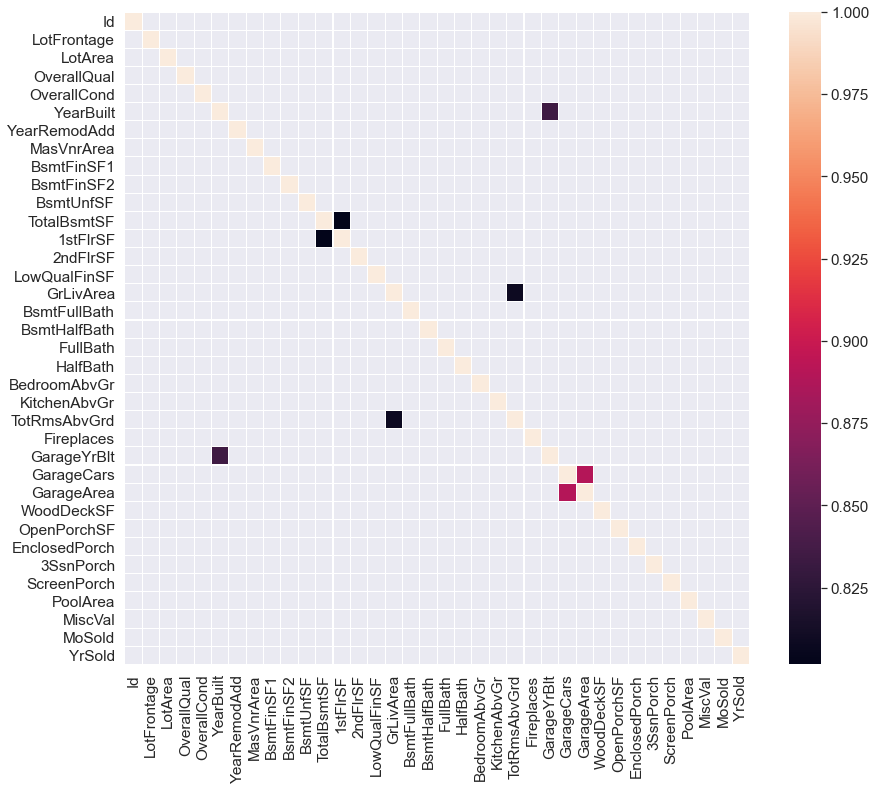

In [93]:
plt.figure(figsize=(14,12))
correlation = numerical.corr()
sns.heatmap(correlation, mask = correlation < 0.8, linewidth=0.1)
sns.set(font_scale=1.4)

**Highly correlated features:**
- YearBuilt and GarageYrBlt
- GrLivArea and TotRmsAbvGrd
- TotalBsmtSF and 1stFlrSF
- GarageArea and GarageCars

We should remove highly correlated features to avoid performance loss in our model.

In [94]:
all_data.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)